<a href="https://colab.research.google.com/github/Bhawanand394/FINAL-PROJECT-SUBMISSION/blob/main/BML_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
image = cv2.imread("/content/drive/My Drive/ML_Dataset/TUMOR_DATASET1/images/3.jpg")
print(image)


None


In [12]:
import os
path = "/content/drive/My Drive/ML_Dataset/TUMOR_DATASET1/images/3.jpg"
print("Exists:", os.path.exists(path))

Exists: False


In [14]:
image = cv2.imread("/content/drive/My Drive/ML_Dataset/TUMOR_DATASET1/3.jpg")
print("Original Shape:", image.shape)

Original Shape: (2320, 1740, 3)


In [15]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
img_256 = cv2.resize(gray, (256, 256))
img_224 = cv2.resize(gray, (224, 224))

In [17]:
h, w = img_256.shape
cropped = img_256[10:h-10, 10:w-10]

In [18]:
img_float = cropped.astype(np.float32)

In [19]:
img_minmax = img_float / 255.0

In [20]:
mean = np.mean(img_float)
std = np.std(img_float)
img_zscore = (img_float - mean) / std

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
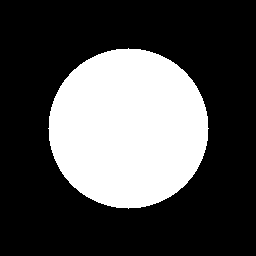

In [21]:
mask = np.zeros_like(img_256, dtype=np.uint8)
center = (128, 128)
radius = 80
cv2.circle(mask, center, radius, 255, -1)

In [22]:
masked_img = cv2.bitwise_and(img_256, img_256, mask=mask)

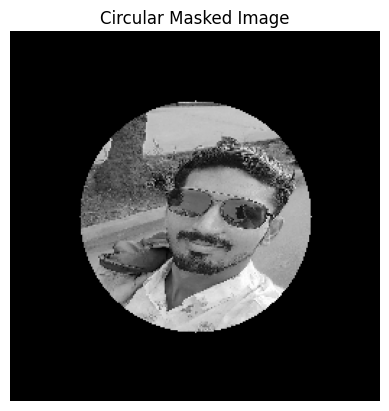

In [23]:
plt.imshow(masked_img, cmap='gray')
plt.title("Circular Masked Image")
plt.axis("off")
plt.show()